# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import datetime as dt
from pathlib import Path
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# btc_price = "${:,.2f}".format((requests.get(url=btc_url).json()).get('data').get('1').get('quotes').get('USD').get('price'))
btc_price = (requests.get(url=btc_url).json()).get('data').get('1').get('quotes').get('USD').get('price')
# print(btc_price)

# Fetch current ETH price
# eth_price = "${:,.2f}".format((requests.get(url=eth_url).json()).get('data').get('1027').get('quotes').get('USD').get('price'))
eth_price = (requests.get(url=eth_url).json()).get('data').get('1027').get('quotes').get('USD').get('price')
# print(eth_price)

# Compute current value of my crpto

my_btc_value= btc_price * my_btc
my_eth_value= eth_price * my_eth
my_crypwallet_value= my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is " + "${:,.2f}".format(my_btc_value))
print(f"The current value of your {my_eth} ETH is " + "${:,.2f}".format(my_eth_value))
print(f"The current value of your crypto wallet is " + "${:,.2f}".format(my_crypwallet_value))

The current value of your 1.2 BTC is $24,154.80
The current value of your 5.3 ETH is $6,011.21
The current value of your crypto wallet is $30,166.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

#get the base directory
basepath=Path()
basedir=str(basepath.cwd())
#load the environment variables
envars= basepath.cwd() / '.env'
load_dotenv(envars)

# authentication and connection details
api_key = os.getenv('ALPACA_API_KEY')
api_secret = os.getenv('ALPACA_SECRET_KEY')
base_url = 'https://paper-api.alpaca.markets'

# Create the Alpaca API object
alpaca = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

In [8]:
# Format current date as ISO format
# current_date=dt.datetime.now().isoformat()
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
# print(today)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2020-07-14 04:00:00+00:00  118.58  118.74  118.58  118.67  3986773   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-07-14 04:00:00+00:00       14581  118.667215  313.25  319.76  312.0   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-07-14 04:00:00+00:00  318.92  93545660      580271  316.244144

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.67
Current SPY closing price: $318.92


In [10]:
# Compute the current value of shares
my_agg_value= agg_close_price * my_agg
my_spy_value= spy_close_price * my_spy
my_portfolio_value= my_agg_value + my_spy_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is "+"${:,.2f}".format(my_spy_value))
print(f"The current value of your {my_agg} AGG shares is "+"${:,.2f}".format(my_agg_value))
print(f"The current value of your portfolio wallet is " + "${:,.2f}".format(my_portfolio_value))

The current value of your 50 SPY shares is $15,946.00
The current value of your 200 AGG shares is $23,734.00
The current value of your portfolio wallet is $39,680.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income=12000
# monthly_income=40000

# Consolidate financial assets data
savings_data=[my_crypwallet_value,my_portfolio_value]

# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, columns=(['amount']), index=(['crypto','stock/bond']))

# Display savings DataFrame
display(savings_df)

,amount
crypto,30166.007
stock/bond,39680.000


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='amount'>

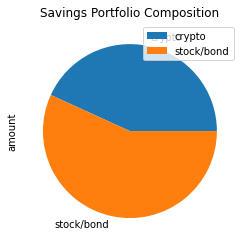

In [12]:
# Plot savings pie chart
savings_df.plot.pie(y="amount", title="Savings Portfolio Composition")

In [73]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_portfolio_value= my_crypwallet_value+my_portfolio_value

# Dollars away from goal
delta_goal=emergency_fund-total_portfolio_value

# print(emergency_fund)
# print(total_portfolio_value)

# Validate saving health
if total_portfolio_value > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_portfolio_value == emergency_fund:
    print("Congratulations! You reached an important financial goal.")
elif total_portfolio_value < emergency_fund:
    print("You are " + "${:,.2f}".format(delta_goal) + " away.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_monte_carlo = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_monte_carlo[df_monte_carlo['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_monte_carlo[df_monte_carlo['symbol']=='SPY'].drop('symbol', axis=1)
AGG.drop(columns=['trade_count', 'vwap'], inplace=True)
SPY.drop(columns=['trade_count', 'vwap'], inplace=True)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
timestamp                                                                    
2017-07-03 04:00:00+00:00  109.30  109.30  109.01  109.09  1817281  242.90   
2017-07-05 04:00:00+00:00  109.08  109.18  109.00  109.15  4288609  242.61   
2017-07-06 04:00:00+00:00  108.95  109.00  108.82  108.94  2284910  241.86   
2017-07-07 04:00:00+00:00  108.89  108.95  108.83  108.90  2727445  241.18   
2017-07-10 04:00:00+00:00  108.97  109.02  108.89  108.95  2386444  241.98   

                                                               
                             high       low   close    volume  
timestamp                                                      
2017-07-03 04:00:00+00:00  243.38  242.2100  242.21  39153806  
2017-07-05 04:00:00+00:00  243.01  241.7000  242.77  54427596  
2017-07-06 04:00:00+00:00  242.03  240.3400  240.55  66115317  
2017-07-07 04:00:00+00:00  242.28  240.5645  242.11  57972268  
2017-07-10 04:00:00+00:00  242.80  241.7600  242.37  36663274

In [37]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# ?MCSimulation
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [38]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-07-03 04:00:00+00:00  109.30  109.30  109.01  109.09  1817281   
2017-07-05 04:00:00+00:00  109.08  109.18  109.00  109.15  4288609   
2017-07-06 04:00:00+00:00  108.95  109.00  108.82  108.94  2284910   
2017-07-07 04:00:00+00:00  108.89  108.95  108.83  108.90  2727445   
2017-07-10 04:00:00+00:00  108.97  109.02  108.89  108.95  2386444   

                                           SPY                            \
                          daily_return    open    high       low   close   
timestamp                                                                  
2017-07-03 04:00:00+00:00          NaN  242.90  243.38  242.2100  242.21   
2017-07-05 04:00:00+00:00     0.000550  242.61  243.01  241.7000  242.77   
2017-07-06 04:00:00+00:00    -0.001924  241.86  242.03  240.3400  240.55   
2017-07-07 04:00:00+00:00    -0.000367  241.18  242.28  240.5645  242.11   
2017-07-10 04:00:00+00:00     0.000459  241.98  242.80  241.7600  242.37   

                                                  
                             volume daily_return  
timestamp                                         
2017-07-03 04:00:00+00:00  39153806          NaN  
2017-07-05 04:00:00+00:00  54427596     0.002312  
2017-07-06 04:00:00+00:00  66115317    -0.009144  
2017-07-07 04:00:00+00:00  57972268     0.006485  
2017-07-10 04:00:00+00:00  36663274     0.001074

In [39]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/michaelcruz/git/FinTech-Mod5-Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995542,0.996245,1.005123,1.004222,0.998886,0.998863,0.991485,0.998260,0.999522,1.000592,...,1.009022,1.007265,0.984331,0.992330,1.001319,0.995880,0.994461,0.998673,0.994793,0.994468
2,0.993022,0.991926,1.005583,0.995064,1.001290,1.008510,0.996787,1.005226,0.992842,1.011500,...,1.010071,1.005373,0.972620,1.007058,0.996302,0.993892,0.993982,0.995346,0.996942,0.998431
3,0.997939,0.985798,0.998777,0.985972,1.006803,1.001947,0.995526,1.003469,0.986393,1.007596,...,1.000446,1.001782,0.978358,1.009387,1.001404,0.992241,0.997109,0.992720,1.003094,0.994039
4,0.994697,0.991994,0.996513,0.992188,1.000547,1.000465,0.993062,0.996521,0.982593,1.017518,...,1.001746,0.996589,0.977079,1.002081,1.000345,0.994894,0.992619,0.997762,1.003372,0.994764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.681573,2.215335,3.662514,2.619114,1.828867,1.341058,1.409386,1.479192,1.685397,1.956414,...,3.089133,2.455389,4.171134,2.139237,5.415378,1.863308,2.868050,3.442978,2.704313,4.821799
7557,2.685544,2.220495,3.634108,2.627026,1.828174,1.331449,1.421116,1.470553,1.681479,1.940542,...,3.095724,2.479924,4.186137,2.151627,5.365249,1.882375,2.907934,3.478357,2.693893,4.833219
7558,2.698231,2.213979,3.635370,2.617033,1.826360,1.340805,1.426639,1.479791,1.673901,1.922968,...,3.076558,2.497024,4.178126,2.158176,5.339684,1.875324,2.922463,3.487819,2.688526,4.859018
7559,2.694057,2.214904,3.614271,2.634499,1.826817,1.344149,1.424100,1.478364,1.681422,1.928014,...,3.091373,2.496422,4.180524,2.160590,5.375465,1.879937,2.906450,3.471306,2.687273,4.822766


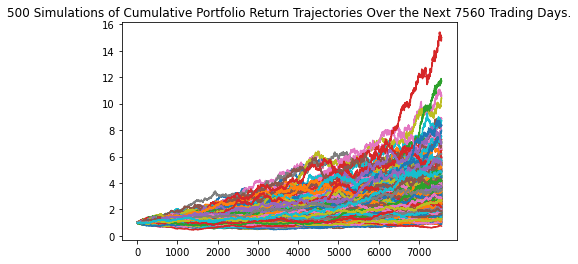

In [40]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

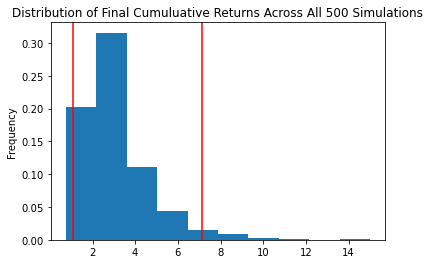

In [43]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.085314
std               1.625245
min               0.748505
25%               2.083009
50%               2.693793
75%               3.668190
max              15.009493
95% CI Lower      1.106643
95% CI Upper      7.125603
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [45]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of "+"${:,.2f}".format(initial_investment)+" in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" "+"${:,.2f}".format(ci_lower)+" and "+"${:,.2f}".format(ci_upper)+" .")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $22,132.85 and $142,512.06 .


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [46]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment2,2)
ci_upper = round(tbl[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of "+"${:,.2f}".format(initial_investment2)+" in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" "+"${:,.2f}".format(ci_lower)+" and "+"${:,.2f}".format(ci_upper)+" .")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $33,199.28 and $213,768.09 .


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [56]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/michaelcruz/git/FinTech-Mod5-Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998689,1.006582,0.997586,0.992788,0.995828,1.001323,0.998101,1.002097,0.993847,1.005447,...,0.999378,1.005020,1.003722,1.001944,0.998594,1.005306,0.994584,1.003508,0.995790,0.993157
2,0.997832,1.001474,0.992703,0.989879,0.998948,1.004140,0.993426,1.006087,0.993091,1.002608,...,1.003773,1.002335,1.006061,1.002525,0.998298,1.003444,0.998744,1.002689,0.999555,0.992759
3,0.995760,0.997695,0.997537,0.997446,0.999516,1.003224,0.998261,1.009146,0.989976,1.005050,...,1.000781,1.000998,1.005712,1.008172,0.994785,1.000278,1.000812,1.004721,0.998938,0.986021
4,0.992002,0.998471,1.000876,1.000836,0.995211,1.003817,0.999595,1.009383,0.992994,1.008356,...,1.000344,1.000805,1.006365,1.007882,0.992886,0.999000,1.001049,1.008246,1.003991,0.982680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.042697,1.022641,1.059789,1.052984,0.927364,0.990574,1.062301,1.262458,1.332531,1.278845,...,0.946613,0.745999,0.934458,0.967180,1.183746,0.933514,1.136326,1.108932,1.046840,0.962198
1257,1.052504,1.024347,1.066023,1.053945,0.928634,0.988048,1.056004,1.263871,1.334738,1.278232,...,0.943790,0.748892,0.935086,0.964201,1.183476,0.934721,1.144806,1.110980,1.042526,0.970337
1258,1.055699,1.017629,1.069133,1.057733,0.928601,0.984326,1.058754,1.257821,1.336207,1.282016,...,0.946845,0.750716,0.933844,0.964898,1.180302,0.928735,1.147136,1.113672,1.041980,0.970695
1259,1.055982,1.020291,1.065913,1.063252,0.928873,0.977631,1.061273,1.256023,1.342485,1.289760,...,0.952187,0.754655,0.934988,0.957426,1.181964,0.926604,1.156941,1.116093,1.036668,0.968684


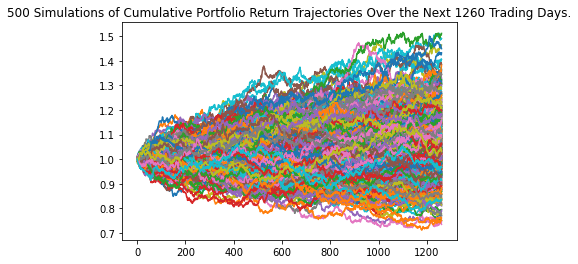

In [57]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot_five.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

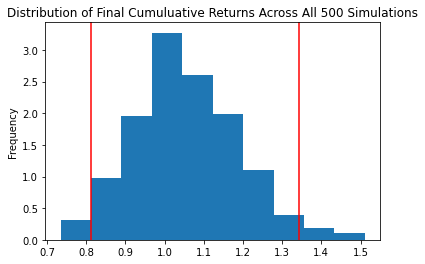

In [58]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot_five.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')


In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.054836
std               0.134683
min               0.734676
25%               0.966362
50%               1.043111
75%               1.144962
max               1.511022
95% CI Lower      0.813143
95% CI Upper      1.343937
Name: 1260, dtype: float64


In [71]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of "+"${:,.2f}".format(initial_investment_five)+" in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" "+"${:,.2f}".format(ci_lower_five)+" and "+"${:,.2f}".format(ci_upper_five)+" .")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 5 years will end within in the range of $48,788.56 and $80,636.21 .


### Ten Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [65]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/michaelcruz/git/FinTech-Mod5-Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000189,0.997254,1.008134,1.003874,1.000092,1.001205,0.998123,0.997445,0.994765,0.999341,...,0.995970,1.007248,1.004838,1.009760,1.001605,0.999533,0.994430,0.997682,1.007268,1.006326
2,1.002381,0.996842,1.013533,1.006068,1.003262,1.000281,1.001421,0.998672,0.993127,1.001117,...,0.993625,1.009735,1.006421,1.009823,1.005043,1.006434,0.989163,1.003609,1.011443,1.001212
3,1.011833,0.999061,1.010317,1.006857,1.011975,0.994845,1.002391,1.003413,0.993654,1.004091,...,0.993752,1.005192,1.003830,1.007983,1.001644,1.003171,0.989301,1.005175,1.019622,0.994289
4,1.004356,1.000812,1.012010,1.007375,1.011338,0.993434,1.002502,1.005106,0.989408,1.011269,...,0.991602,0.998553,1.008424,1.011351,0.998567,1.011368,0.988195,1.010699,1.013280,0.994551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.161559,1.219516,0.999407,1.016855,1.018077,1.248490,1.283931,1.215336,1.480623,1.256385,...,1.089433,1.321980,1.332503,1.210775,1.171099,0.884974,1.467727,1.153908,1.189153,1.243141
2517,1.158634,1.228476,1.002934,1.021263,1.012643,1.244908,1.279654,1.225014,1.486847,1.249269,...,1.084988,1.318378,1.328061,1.214075,1.176375,0.888615,1.470641,1.149259,1.187416,1.249562
2518,1.158691,1.225618,1.008280,1.024106,1.018242,1.257697,1.282760,1.226280,1.487107,1.250511,...,1.088944,1.312038,1.337654,1.208989,1.169070,0.887671,1.474300,1.144178,1.194971,1.257403
2519,1.162159,1.231796,1.004481,1.029064,1.026170,1.269113,1.285475,1.230736,1.483001,1.250657,...,1.090203,1.309787,1.336045,1.209675,1.168003,0.886282,1.465101,1.143188,1.201525,1.257008


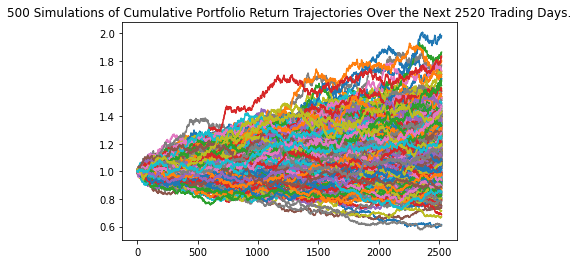

In [66]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()

# Save the plot for future usage
line_plot_ten.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

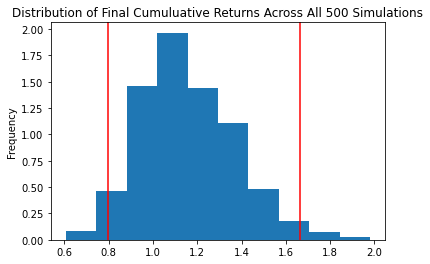

In [67]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyear.plot_distribution()

# Save the plot for future usage
dist_plot_ten.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.157437
std               0.219854
min               0.606888
25%               0.988816
50%               1.137336
75%               1.299768
max               1.980510
95% CI Lower      0.797691
95% CI Upper      1.661664
Name: 2520, dtype: float64


In [70]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of "+"${:,.2f}".format(initial_investment_ten)+" in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" "+"${:,.2f}".format(ci_lower_ten)+" and "+"${:,.2f}".format(ci_upper_ten)+" .")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 10 years will end within in the range of $47,861.48 and $99,699.82 .
